In [151]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np 

# Import data 


In [152]:
xlsx = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
cus_transaction=pd.read_excel(xlsx, 'Transactions')
cus_list = pd.read_excel(xlsx, 'NewCustomerList')
cus_demographic= pd.read_excel(xlsx, 'CustomerDemographic')
cus_address = pd. read_excel(xlsx,'CustomerAddress')

# Access customer's address 


In [153]:
cus_address = pd. read_excel(xlsx,'CustomerAddress')
cus_address

,customer_id,address,postcode,state,country,property_valuation
0,819,84 Loomis Pass,2000,NSW,Australia,12
1,1815,1508 Hooker Avenue,2000,NSW,Australia,8
2,2560,583 Eagle Crest Road,2000,NSW,Australia,8
3,2629,2 Beilfuss Plaza,2000,NSW,Australia,9
4,2636,701 Talisman Crossing,2000,NSW,Australia,10
...,...,...,...,...,...,...
3994,1794,59 Old Gate Drive,4878,QLD,Australia,5
3995,2688,22 Moulton Place,4878,QLD,Australia,4
3996,2406,645 Thackeray Street,4879,QLD,Australia,6
3997,2424,9 Northwestern Pass,4879,QLD,Australia,6


In [154]:
cus_address.state.replace({"New South Wales":"NSW","Victoria":"VIC"},inplace=True)


In [155]:
cus_address

,customer_id,address,postcode,state,country,property_valuation
0,819,84 Loomis Pass,2000,NSW,Australia,12
1,1815,1508 Hooker Avenue,2000,NSW,Australia,8
2,2560,583 Eagle Crest Road,2000,NSW,Australia,8
3,2629,2 Beilfuss Plaza,2000,NSW,Australia,9
4,2636,701 Talisman Crossing,2000,NSW,Australia,10
...,...,...,...,...,...,...
3994,1794,59 Old Gate Drive,4878,QLD,Australia,5
3995,2688,22 Moulton Place,4878,QLD,Australia,4
3996,2406,645 Thackeray Street,4879,QLD,Australia,6
3997,2424,9 Northwestern Pass,4879,QLD,Australia,6


# RFM model 

### choose 100 customers who are worthy to be retained. 

In [156]:
cus_transaction

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profits
0,140,11,462,2017-01-01,0.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,42560.0,509.97
1,517,77,311,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,40672.0,1660.88
2,561,65,2298,2017-01-01,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,40410.0,1028.76
3,1293,67,1931,2017-01-01,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0,167.21
4,1403,0,2891,2017-01-01,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,34170.0,45.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,17394,20,933,2017-12-30,0.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,35160.0,195.34
19996,18609,27,2372,2017-12-30,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,36334.0,110.81
19997,19346,4,543,2017-12-30,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,451.65
19998,19907,41,1721,2017-12-30,0.0,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,38693.0,209.84


In [157]:
cus_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [158]:
# last data 
cus_transaction["transaction_date"].max()

Timestamp('2017-12-30 00:00:00')

In [159]:
# import library data
import datetime as dt 
# set lastest date as 2017-12-30 
Lastestdate=dt.datetime(2017,12,30)
# RFM model 
RFM_model=cus_transaction.groupby("customer_id").agg({"transaction_date": (lambda x: (x.max()-Lastestdate).days),"transaction_id":(lambda x: len(x)),'Profits': (lambda x: x.sum())})
# rename
RFM_model.rename(columns={'transaction_date': 'Recency', 
                         'transaction_id': 'Frequency', 
                         'Profits': 'Monetary'}, inplace=True)

In [160]:
RFM_model

,Recency,Frequency,Monetary
customer_id,,,
1,-7,11,3018.090000
2,-128,3,2226.260000
3,-102,8,3362.810000
4,-195,2,220.570000
5,-16,6,2394.940000
...,...,...,...
3497,-52,3,1648.320000
3498,-127,6,3147.330000
3499,-51,7,4955.250000


In [161]:
len(RFM_model)

3494

In [162]:
RFM_model.describe()

,Recency,Frequency,Monetary
count,3494.000000,3494.000000,3494.000000
mean,-60.813681,5.724098,3189.808588
std,57.787120,2.325873,1794.440980
min,-353.000000,1.000000,15.080000
25%,-85.000000,4.000000,1905.947500
50%,-44.000000,6.000000,2918.195000
75%,-17.000000,7.000000,4273.397500
max,0.000000,14.000000,11668.950000


In [163]:
# split into four segment 
quantiles=RFM_model.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()
quantiles

{'Frequency': {0.25: 4.0, 0.5: 6.0, 0.75: 7.0},
 'Monetary': {0.25: 1905.9475,
  0.5: 2918.1949999999997,
  0.75: 4273.397499999999},
 'Recency': {0.25: -85.0, 0.5: -44.0, 0.75: -17.0}}

In [164]:
# fuctnion to creat score 
def RScore(recency,keys,values):
  if recency<=values[keys][0.25]:
    return 4
  elif recency<=values[keys][0.5]:
    return 3
  elif recency<=values[keys][0.75]:
    return 2 
  else:
    return 1
def FnMScore(frequencynmoney,keys,values):
  if frequencynmoney<=values[keys][0.25]:
    return 1
  elif frequencynmoney<=values[keys][0.5]:
    return 2 
  elif frequencynmoney<=values[keys][0.75]:
    return 3
  else:
    return 4

In [165]:
args=('Recency',quantiles,)
args

('Recency',
 {'Frequency': {0.25: 4.0, 0.5: 6.0, 0.75: 7.0},
  'Monetary': {0.25: 1905.9475,
   0.5: 2918.1949999999997,
   0.75: 4273.397499999999},
  'Recency': {0.25: -85.0, 0.5: -44.0, 0.75: -17.0}})

In [166]:

RFM_model["R"]=RFM_model["Recency"].apply(RScore,args=('Recency',quantiles,))
RFM_model["F"]=RFM_model["Frequency"].apply(FnMScore,args=("Frequency",quantiles,))
RFM_model["M"]=RFM_model["Monetary"].apply(FnMScore,args=("Monetary",quantiles,))

In [167]:
RFM_model

,Recency,Frequency,Monetary,R,F,M
customer_id,,,,,,
1,-7,11,3018.090000,1,4,3
2,-128,3,2226.260000,4,1,2
3,-102,8,3362.810000,4,4,3
4,-195,2,220.570000,4,1,1
5,-16,6,2394.940000,1,2,2
...,...,...,...,...,...,...
3497,-52,3,1648.320000,3,1,1
3498,-127,6,3147.330000,4,2,3
3499,-51,7,4955.250000,3,3,4


In [168]:
# RFMGroup is comebine number as string as R F M
RFM_model["RFMGroup"]=RFM_model["R"].map(str)+RFM_model["F"].map(str)+RFM_model["M"].map(str)
# RFMScore is sum all R F M
RFM_model["RFMScore"]=RFM_model["R"]+RFM_model["F"]+RFM_model["M"]
RFM_model

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
customer_id,,,,,,,,
1,-7,11,3018.090000,1,4,3,143,8
2,-128,3,2226.260000,4,1,2,412,7
3,-102,8,3362.810000,4,4,3,443,11
4,-195,2,220.570000,4,1,1,411,6
5,-16,6,2394.940000,1,2,2,122,5
...,...,...,...,...,...,...,...,...
3497,-52,3,1648.320000,3,1,1,311,5
3498,-127,6,3147.330000,4,2,3,423,9
3499,-51,7,4955.250000,3,3,4,334,10


In [169]:
# Assign level of loyalty 
loyal_level=["Broze","Siver","Gold","Platinum"]
Score_cut=pd.cut(RFM_model.RFMScore,bins=4,labels=loyal_level)
RFM_model["loyal_level"]=Score_cut.values
RFM_model.reset_index()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,loyal_level
0,1,-7,11,3018.090000,1,4,3,143,8,Gold
1,2,-128,3,2226.260000,4,1,2,412,7,Siver
2,3,-102,8,3362.810000,4,4,3,443,11,Platinum
3,4,-195,2,220.570000,4,1,1,411,6,Siver
4,5,-16,6,2394.940000,1,2,2,122,5,Broze
...,...,...,...,...,...,...,...,...,...,...
3489,3497,-52,3,1648.320000,3,1,1,311,5,Broze
3490,3498,-127,6,3147.330000,4,2,3,423,9,Gold
3491,3499,-51,7,4955.250000,3,3,4,334,10,Platinum
3492,3500,-144,6,1785.860000,4,2,1,421,7,Siver


In [170]:
RFM_model=RFM_model.sort_values(["RFMScore","Monetary"],ascending=False)
RFM_model.head(100)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,loyal_level
customer_id,,,,,,,,,
1043,-130,10,10252.74,4,4,4,444,12,Platinum
3212,-99,8,8830.42,4,4,4,444,12,Platinum
473,-115,9,8364.66,4,4,4,444,12,Platinum
2894,-86,9,7544.08,4,4,4,444,12,Platinum
168,-136,9,7372.43,4,4,4,444,12,Platinum
...,...,...,...,...,...,...,...,...,...
48,-82,8,5561.08,3,4,4,344,11,Platinum
2615,-55,9,5517.12,3,4,4,344,11,Platinum
294,-115,7,5509.67,4,3,4,434,11,Platinum


## 100 customers make the most profit 

In [171]:
RFM_model=RFM_model.iloc[0:100]
RFM_model

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,loyal_level
customer_id,,,,,,,,,
1043,-130,10,10252.74,4,4,4,444,12,Platinum
3212,-99,8,8830.42,4,4,4,444,12,Platinum
473,-115,9,8364.66,4,4,4,444,12,Platinum
2894,-86,9,7544.08,4,4,4,444,12,Platinum
168,-136,9,7372.43,4,4,4,444,12,Platinum
...,...,...,...,...,...,...,...,...,...
48,-82,8,5561.08,3,4,4,344,11,Platinum
2615,-55,9,5517.12,3,4,4,344,11,Platinum
294,-115,7,5509.67,4,3,4,434,11,Platinum


# Analyse customer's demographic 

In [172]:
cus_demographic= pd.read_excel(xlsx, 'CustomerDemographic')
cus_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [173]:
# left join
cus_info = pd.merge(RFM_model,cus_demographic , how='left', on=['customer_id'])
cus_info

,customer_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,loyal_level,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1043,-130,10,10252.74,4,4,4,444,12,Platinum,Giorgi,Hurford,Male,34,1986-10-20,Sales Associate,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,16.0
1,3212,-99,8,8830.42,4,4,4,444,12,Platinum,Corella,Bartomeu,Female,62,1981-01-15,Analog Circuit Design manager,Financial Services,Affluent Customer,N,ï¼ï¼ï¼,No,13.0
2,473,-115,9,8364.66,4,4,4,444,12,Platinum,Benji,O'Shirine,Male,2,1977-03-13,Junior Executive,Health,Mass Customer,N,(ï½¡â â âï½¡),Yes,20.0
3,2894,-86,9,7544.08,4,4,4,444,12,Platinum,Gilburt,NaN,Male,91,1977-04-19,Geologist III,Financial Services,Mass Customer,N,-100,Yes,22.0
4,168,-136,9,7372.43,4,4,4,444,12,Platinum,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,NaN,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,48,-82,8,5561.08,3,4,4,344,11,Platinum,Rebbecca,Casone,Female,46,1975-08-15,Biostatistician II,NaN,Mass Customer,N,../../../../../../../../../../../etc/hosts,Yes,8.0
96,2615,-55,9,5517.12,3,4,4,344,11,Platinum,Cordelia,NaN,Female,23,1998-08-13,Nurse,Financial Services,Mass Customer,N,Ù¡Ù¢Ù£,Yes,1.0
97,294,-115,7,5509.67,4,3,4,434,11,Platinum,Magnum,Slowan,Male,39,1959-04-01,Recruiting Manager,NaN,High Net Worth,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,No,5.0
98,3406,-46,10,5463.64,3,4,4,344,11,Platinum,Lucy,Lackmann,Female,35,1979-04-28,Business Systems Development Analyst,IT,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0


**1)Replace M, F, U in `gender` to Male, Female, Unknown**

In [174]:
cus_info.gender.replace({'U':'Unknown','F':"Female","M":"Male"},inplace=True)

**4)drop `default` columns**

In [175]:
cus_info.drop("default",axis=1,inplace=True)

In [176]:
cus_info

,customer_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,loyal_level,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1043,-130,10,10252.74,4,4,4,444,12,Platinum,Giorgi,Hurford,Male,34,1986-10-20,Sales Associate,Financial Services,Mass Customer,N,Yes,16.0
1,3212,-99,8,8830.42,4,4,4,444,12,Platinum,Corella,Bartomeu,Female,62,1981-01-15,Analog Circuit Design manager,Financial Services,Affluent Customer,N,No,13.0
2,473,-115,9,8364.66,4,4,4,444,12,Platinum,Benji,O'Shirine,Male,2,1977-03-13,Junior Executive,Health,Mass Customer,N,Yes,20.0
3,2894,-86,9,7544.08,4,4,4,444,12,Platinum,Gilburt,NaN,Male,91,1977-04-19,Geologist III,Financial Services,Mass Customer,N,Yes,22.0
4,168,-136,9,7372.43,4,4,4,444,12,Platinum,Reggie,Broggetti,Unknown,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,48,-82,8,5561.08,3,4,4,344,11,Platinum,Rebbecca,Casone,Female,46,1975-08-15,Biostatistician II,NaN,Mass Customer,N,Yes,8.0
96,2615,-55,9,5517.12,3,4,4,344,11,Platinum,Cordelia,NaN,Female,23,1998-08-13,Nurse,Financial Services,Mass Customer,N,Yes,1.0
97,294,-115,7,5509.67,4,3,4,434,11,Platinum,Magnum,Slowan,Male,39,1959-04-01,Recruiting Manager,NaN,High Net Worth,N,No,5.0
98,3406,-46,10,5463.64,3,4,4,344,11,Platinum,Lucy,Lackmann,Female,35,1979-04-28,Business Systems Development Analyst,IT,Mass Customer,N,Yes,10.0


# merge customer info with customer address




In [177]:

cus_info = pd.merge(cus_info,cus_address , how='left', on=['customer_id'])

In [178]:
cus_info

,customer_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,loyal_level,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1043,-130,10,10252.74,4,4,4,444,12,Platinum,Giorgi,Hurford,Male,34,1986-10-20,Sales Associate,Financial Services,Mass Customer,N,Yes,16.0,91 Spohn Plaza,4573.0,QLD,Australia,7.0
1,3212,-99,8,8830.42,4,4,4,444,12,Platinum,Corella,Bartomeu,Female,62,1981-01-15,Analog Circuit Design manager,Financial Services,Affluent Customer,N,No,13.0,4 Farragut Center,2065.0,NSW,Australia,12.0
2,473,-115,9,8364.66,4,4,4,444,12,Platinum,Benji,O'Shirine,Male,2,1977-03-13,Junior Executive,Health,Mass Customer,N,Yes,20.0,29 South Point,3111.0,VIC,Australia,9.0
3,2894,-86,9,7544.08,4,4,4,444,12,Platinum,Gilburt,NaN,Male,91,1977-04-19,Geologist III,Financial Services,Mass Customer,N,Yes,22.0,666 Holy Cross Parkway,4818.0,QLD,Australia,4.0
4,168,-136,9,7372.43,4,4,4,444,12,Platinum,Reggie,Broggetti,Unknown,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN,16 Golf View Center,3020.0,VIC,Australia,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,48,-82,8,5561.08,3,4,4,344,11,Platinum,Rebbecca,Casone,Female,46,1975-08-15,Biostatistician II,NaN,Mass Customer,N,Yes,8.0,22125 Ramsey Drive,3198.0,VIC,Australia,9.0
96,2615,-55,9,5517.12,3,4,4,344,11,Platinum,Cordelia,NaN,Female,23,1998-08-13,Nurse,Financial Services,Mass Customer,N,Yes,1.0,51313 Fulton Junction,2580.0,NSW,Australia,7.0
97,294,-115,7,5509.67,4,3,4,434,11,Platinum,Magnum,Slowan,Male,39,1959-04-01,Recruiting Manager,NaN,High Net Worth,N,No,5.0,807 Beilfuss Crossing,3030.0,VIC,Australia,7.0
98,3406,-46,10,5463.64,3,4,4,344,11,Platinum,Lucy,Lackmann,Female,35,1979-04-28,Business Systems Development Analyst,IT,Mass Customer,N,Yes,10.0,5 Northland Plaza,2096.0,NSW,Australia,9.0


# Merge with transaction data 

In [179]:
cus_info=pd.merge(cus_info, cus_transaction, on="customer_id")
cus_info

,customer_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,loyal_level,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profits
0,1043,-130,10,10252.74,4,4,4,444,12,Platinum,Giorgi,Hurford,Male,34,1986-10-20,Sales Associate,Financial Services,Mass Customer,N,Yes,16.0,91 Spohn Plaza,4573.0,QLD,Australia,7.0,13078,68,2017-03-01,0.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,34996.0,1592.19
1,1043,-130,10,10252.74,4,4,4,444,12,Platinum,Giorgi,Hurford,Male,34,1986-10-20,Sales Associate,Financial Services,Mass Customer,N,Yes,16.0,91 Spohn Plaza,4573.0,QLD,Australia,7.0,3804,79,2017-03-20,0.0,Approved,Norco Bicycles,Standard,medium,medium,1555.58,818.01,33429.0,737.57
2,1043,-130,10,10252.74,4,4,4,444,12,Platinum,Giorgi,Hurford,Male,34,1986-10-20,Sales Associate,Financial Services,Mass Customer,N,Yes,16.0,91 Spohn Plaza,4573.0,QLD,Australia,7.0,10137,65,2017-04-27,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,42105.0,1028.76
3,1043,-130,10,10252.74,4,4,4,444,12,Platinum,Giorgi,Hurford,Male,34,1986-10-20,Sales Associate,Financial Services,Mass Customer,N,Yes,16.0,91 Spohn Plaza,4573.0,QLD,Australia,7.0,10014,63,2017-05-01,1.0,Approved,Solex,Standard,medium,medium,1483.20,99.59,40487.0,1383.61
4,1043,-130,10,10252.74,4,4,4,444,12,Platinum,Giorgi,Hurford,Male,34,1986-10-20,Sales Associate,Financial Services,Mass Customer,N,Yes,16.0,91 Spohn Plaza,4573.0,QLD,Australia,7.0,19177,0,2017-06-06,0.0,Approved,NaN,NaN,NaN,NaN,2086.07,NaN,NaN,2086.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,394,-45,8,5445.46,3,4,4,344,11,Platinum,Roanne,Cowthard,Female,70,1977-06-06,Legal Assistant,Health,High Net Worth,N,Yes,16.0,7343 Washington Road,2287.0,NSW,Australia,5.0,18546,0,2017-05-08,1.0,Approved,Trek Bicycles,Road,medium,medium,290.62,215.14,35667.0,75.48
884,394,-45,8,5445.46,3,4,4,344,11,Platinum,Roanne,Cowthard,Female,70,1977-06-06,Legal Assistant,Health,High Net Worth,N,Yes,16.0,7343 Washington Road,2287.0,NSW,Australia,5.0,17920,72,2017-06-14,0.0,Approved,OHM Cycles,Standard,medium,medium,912.52,141.40,34170.0,771.12
885,394,-45,8,5445.46,3,4,4,344,11,Platinum,Roanne,Cowthard,Female,70,1977-06-06,Legal Assistant,Health,High Net Worth,N,Yes,16.0,7343 Washington Road,2287.0,NSW,Australia,5.0,4564,29,2017-08-21,0.0,Approved,WeareA2B,Standard,medium,medium,1065.03,230.09,38002.0,834.94
886,394,-45,8,5445.46,3,4,4,344,11,Platinum,Roanne,Cowthard,Female,70,1977-06-06,Legal Assistant,Health,High Net Worth,N,Yes,16.0,7343 Washington Road,2287.0,NSW,Australia,5.0,13396,35,2017-09-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,33549.0,448.68


# Exploration Analysis 

### explore tenure

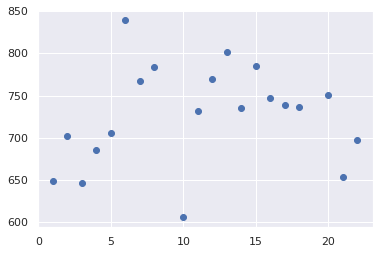

In [260]:
tenure1=cus_info.groupby(cus_info["tenure"])["Profits"].mean()
tenure1=tenure1.reset_index()
plt.scatter(x="tenure",y="Profits",data=tenure1)


## explore gender

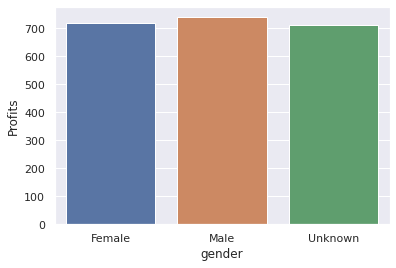

In [257]:
gender1=cus_info.groupby(cus_info["gender"])["Profits"].mean()
gender1=gender1.reset_index()
gender1
sns.barplot(x="gender",y="Profits",data=gender1)


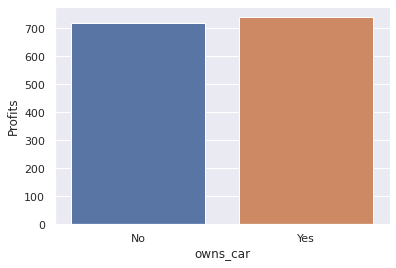

In [286]:
owns_car1 =cus_info.groupby(cus_info["owns_car"])["Profits"].mean()
owns_car1=owns_car1.reset_index()
owns_car1
sns.barplot(x="owns_car",y="Profits",data=owns_car1);


### brand

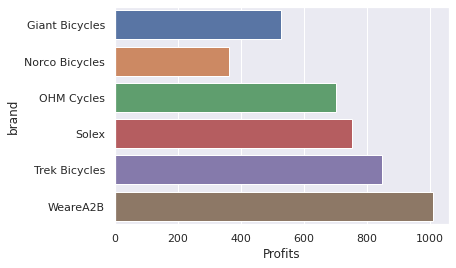

In [285]:
owns_car1 =cus_info.groupby(cus_info["brand"])["Profits"].mean()
owns_car1=owns_car1.reset_index()
owns_car1
sns.barplot(x="Profits",y="brand",data=owns_car1)

### age 

In [289]:
import datetime
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [298]:

cus_info['age'] =cus_info['DOB'].apply(from_dob_to_age)
cus_info["age"].unique()

array([ 33.,  39.,  43.,  nan,  23.,  60.,  24.,  47.,  63., 176.,  31.,
        66.,  42.,  51.,  57.,  52.,  41.,  30.,  55.,  49.,  20.,  48.,
        62.,  44.,  32.,  53.,  46.,  35.,  40.,  38.,  19.,  22.,  25.,
        64.,  58.,  50.,  21.,  28.,  45.,  61.])

Text(0, 0.5, 'list_price')

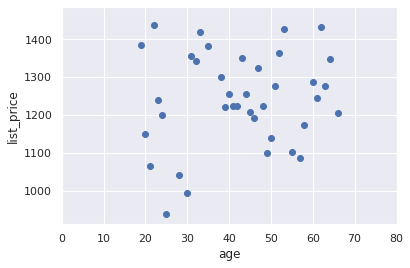

In [304]:
tenure1=cus_info.groupby(cus_info["age"])["list_price"].mean()
tenure1=tenure1.reset_index()
plt.scatter(x="age",y="list_price",data=tenure1);
plt.xlim([0,80])
plt.xlabel("age")
plt.ylabel("list_price")

#online order 

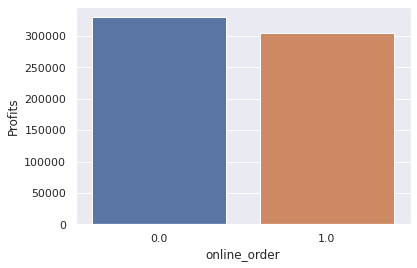

In [312]:
tenure1=cus_info.groupby(cus_info["online_order"])["Profits"].sum()
tenure1=tenure1.reset_index()
sns.barplot(x="online_order",y="Profits",data=tenure1);

# Exploration Analysis of 3 wealth segment 




## Analyse type of customers 

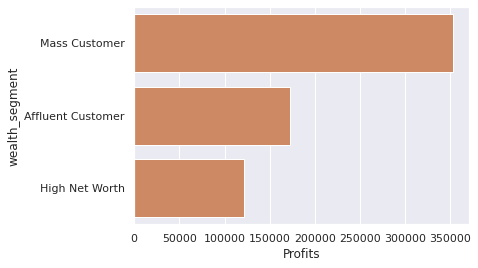

In [180]:

wealth=cus_info.groupby("wealth_segment")["Profits"].sum()
wealth=wealth.reset_index().sort_values(by="Profits",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="Profits",y="wealth_segment",data=wealth,color=base_color)

## Mass customers


### Job industry in Mass customers

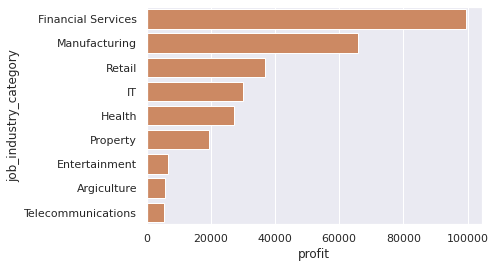

In [181]:
# group by job industry and affluent customers
mass=cus_info[cus_info["wealth_segment"]=="Mass Customer"]
mass=mass.groupby("job_industry_category")["Profits"].sum()
mass=mass.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="job_industry_category",data=mass,color=base_color)

### Job title Affluent customers 

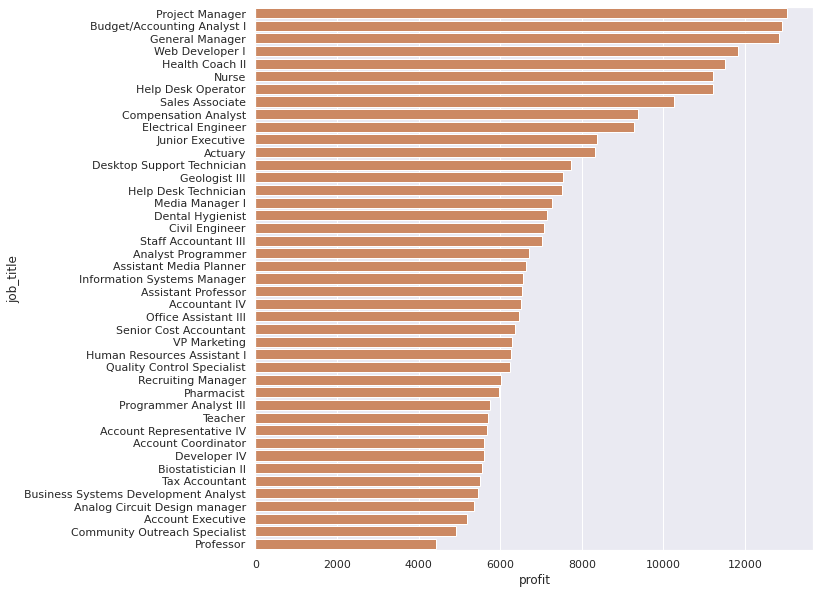

In [182]:

mass=cus_info[cus_info["wealth_segment"]=="Mass Customer"]
mass=mass.groupby("job_title")["Profits"].sum()
mass=mass.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
plt.figure(figsize=(10,10))
sns.barplot(x="profit",y="job_title",data=mass,color=base_color)


### State of mass customers

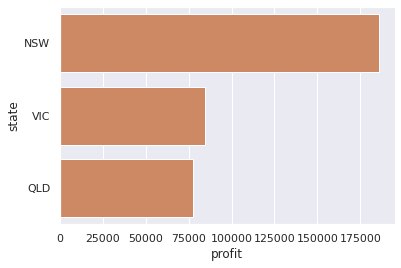

In [183]:

mass=cus_info[cus_info["wealth_segment"]=="Mass Customer"]
mass=mass.groupby("state")["Profits"].sum()
mass=mass.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="state",data=mass,color=base_color)

### Brand of Mass customers  

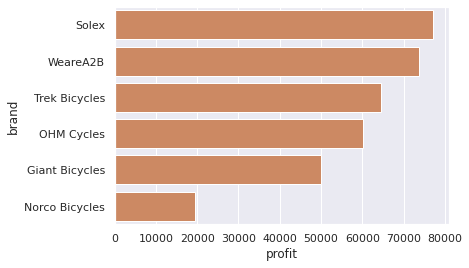

In [184]:
mass=cus_info[cus_info["wealth_segment"]=="Mass Customer"]
mass=mass.groupby("brand")["Profits"].sum()
mass=mass.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="brand",data=mass,color=base_color)

### Product line of Mass customers

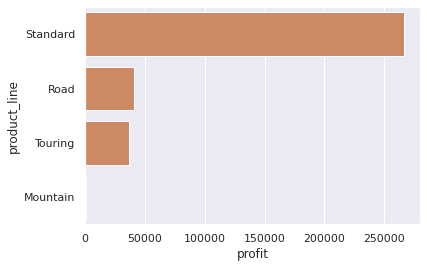

In [185]:
mass=cus_info[cus_info["wealth_segment"]=="Mass Customer"]
mass=mass.groupby("product_line")["Profits"].sum()
mass=mass.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="product_line",data=mass,color=base_color)

### Product size of Mass customers 

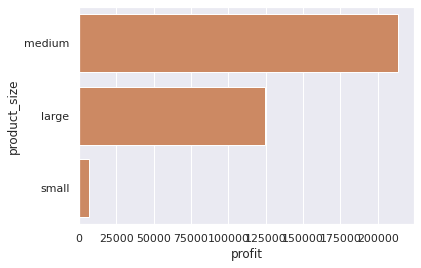

In [186]:
mass=cus_info[cus_info["wealth_segment"]=="Mass Customer"]
mass=mass.groupby("product_size")["Profits"].sum()
mass=mass.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="product_size",data=mass,color=base_color)

### Product class of Mass customers

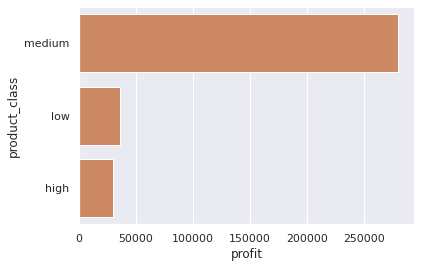

In [187]:
mass=cus_info[cus_info["wealth_segment"]=="Mass Customer"]
mass=mass.groupby("product_class")["Profits"].sum()
mass=mass.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="product_class",data=mass,color=base_color)

### Gender of Mass customers who buy bicycle

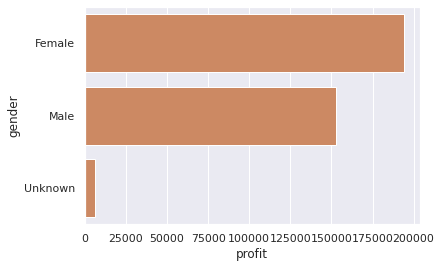

In [188]:
mass=cus_info[cus_info["wealth_segment"]=="Mass Customer"]
mass=mass.groupby("gender")["Profits"].sum()
mass=mass.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="gender",data=mass,color=base_color)

### Own car or not

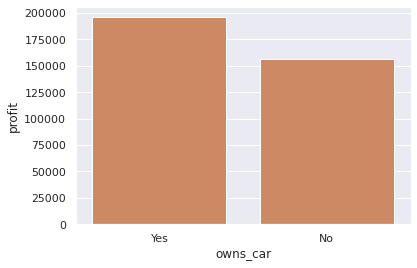

In [189]:
mass=cus_info[cus_info["wealth_segment"]=="Mass Customer"]
mass=mass.groupby("owns_car")["Profits"].sum()
mass=mass.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="owns_car",y="profit",data=mass,color=base_color)

### Online or not

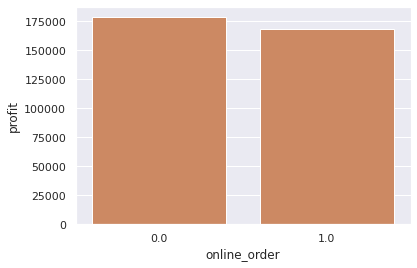

In [190]:
mass=cus_info[cus_info["wealth_segment"]=="Mass Customer"]
mass=mass.groupby("online_order")["Profits"].sum()
mass=mass.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="online_order",y="profit",data=mass,color=base_color)

## Affluent customers 

### Job industry in Affluent customers 

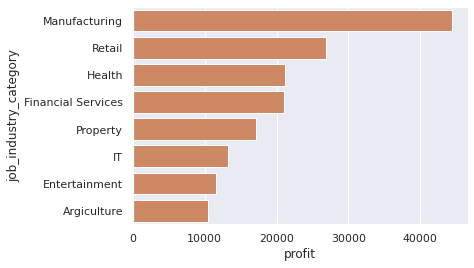

In [191]:
# group by job industry and affluent customers
affluent=cus_info[cus_info["wealth_segment"]=="Affluent Customer"]
affluent_industry=affluent.groupby("job_industry_category")["Profits"].sum()
affluent_industry=affluent_industry.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="job_industry_category",data=affluent_industry,color=base_color)

### job title 


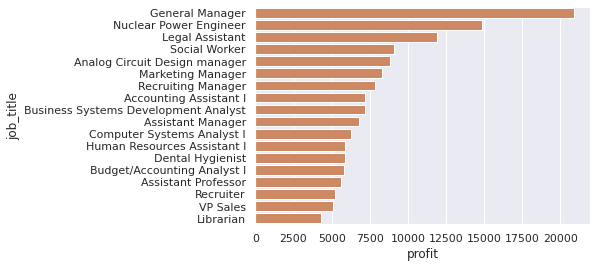

In [192]:
affluent=cus_info[cus_info["wealth_segment"]=="Affluent Customer"]
affluent=affluent.groupby("job_title")["Profits"].sum()
affluent=affluent.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="job_title",data=affluent,color=base_color)

### state of Affluent customers 

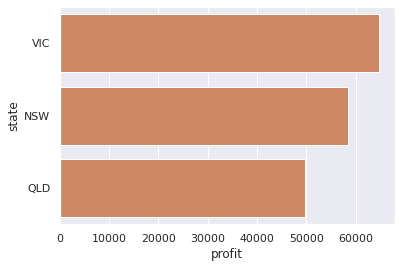

In [193]:
state_affluent=cus_info[cus_info["wealth_segment"]=="Affluent Customer"]
state_affluent=state_affluent.groupby("state")["Profits"].sum()
state_affluent=state_affluent.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="state",data=state_affluent,color=base_color)

### Brand of Affluent customers  

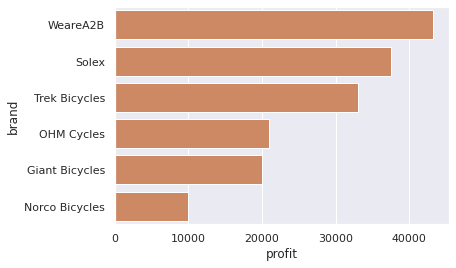

In [194]:
brand_affluent=cus_info[cus_info["wealth_segment"]=="Affluent Customer"]
brand_affluent=brand_affluent.groupby("brand")["Profits"].sum()
brand_affluent=brand_affluent.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="brand",data=brand_affluent,color=base_color)

### gender of Affluent customers who buy bicycle 

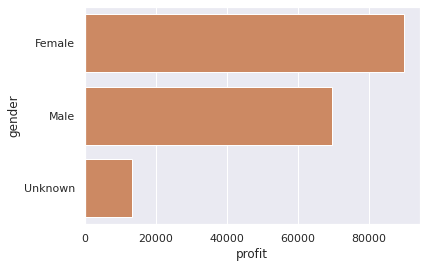

In [195]:
gender_affluent=cus_info[cus_info["wealth_segment"]=="Affluent Customer"]
gender_affluent=gender_affluent.groupby("gender")["Profits"].sum()
gender_affluent=gender_affluent.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="gender",data=gender_affluent,color=base_color)

### product line of affluent customers 

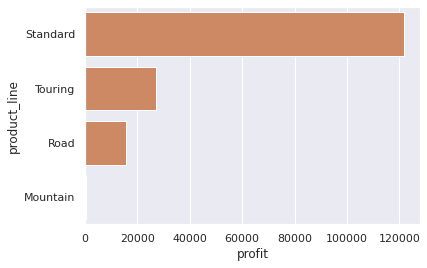

In [196]:
product_line_affluent=cus_info[cus_info["wealth_segment"]=="Affluent Customer"]
product_line_affluent=product_line_affluent.groupby("product_line")["Profits"].sum()
product_line_affluent=product_line_affluent.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="product_line",data=product_line_affluent,color=base_color)

### product size of affluent customers 

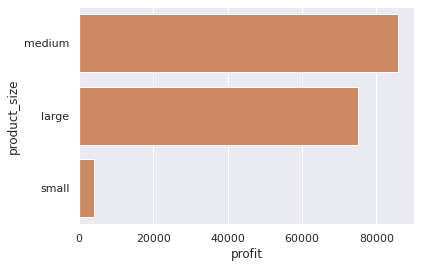

In [197]:
product_size_affluent=cus_info[cus_info["wealth_segment"]=="Affluent Customer"]
product_size_affluent=product_size_affluent.groupby("product_size")["Profits"].sum()
product_size_affluent=product_size_affluent.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="product_size",data=product_size_affluent,color=base_color)

### product class  of affluent customers 

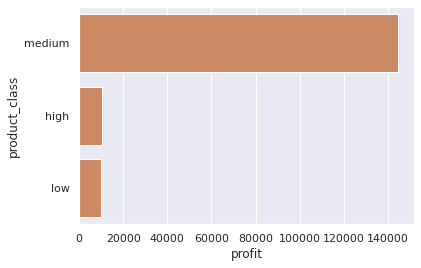

In [198]:
product_class_affluent=cus_info[cus_info["wealth_segment"]=="Affluent Customer"]
product_class_affluent=product_class_affluent.groupby("product_class")["Profits"].sum()
product_class_affluent=product_class_affluent.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="product_class",data=product_class_affluent,color=base_color)

### own car or not 

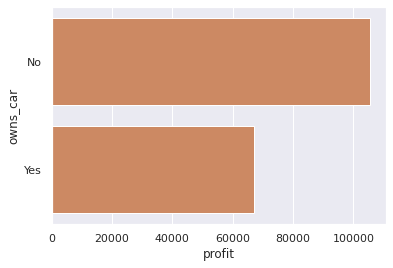

In [199]:
affluent=cus_info[cus_info["wealth_segment"]=="Affluent Customer"]
affluent=affluent.groupby("owns_car")["Profits"].sum()
affluent=affluent.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="owns_car",data=affluent,color=base_color)

### online or not 

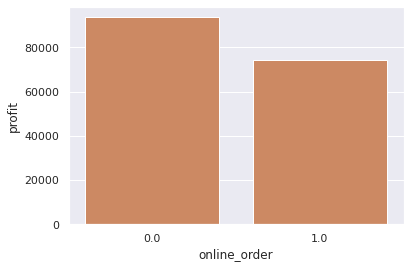

In [200]:
affluent=cus_info[cus_info["wealth_segment"]=="Affluent Customer"]
affluent=affluent.groupby("online_order")["Profits"].sum()
affluent=affluent.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="online_order",y="profit",data=affluent,color=base_color)

## Highnetworth

### Job tittle of high net worth customers


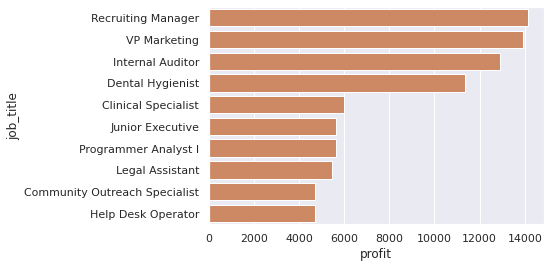

In [201]:
# group by job industry and high networth customers
HighNetWorth=cus_info[cus_info["wealth_segment"]=="High Net Worth"]
HighNetWorth=HighNetWorth.groupby("job_title")["Profits"].sum()
HighNetWorth=HighNetWorth.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="job_title",data=HighNetWorth,color=base_color)

# job industry  of highnetworth 

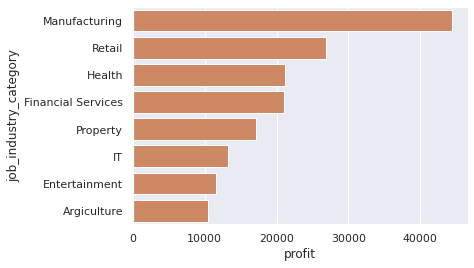

In [202]:
# group by job industry and high networth customers
HighNetWorth=cus_info[cus_info["wealth_segment"]=="High Net Worth"]
HighNetWortht_industry=HighNetWorth.groupby("job_industry_category")["Profits"].sum()
HighNetWortht_industry=HighNetWortht_industry.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="job_industry_category",data=affluent_industry,color=base_color)

### state of highnetworth

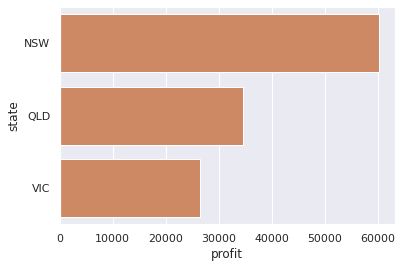

In [203]:
state_HighNetWorth=cus_info[cus_info["wealth_segment"]=="High Net Worth"]
state_HighNetWorth=state_HighNetWorth.groupby("state")["Profits"].sum()
state_HighNetWorth=state_HighNetWorth.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="state",data=state_HighNetWorth,color=base_color)

### brand of highnetworth 


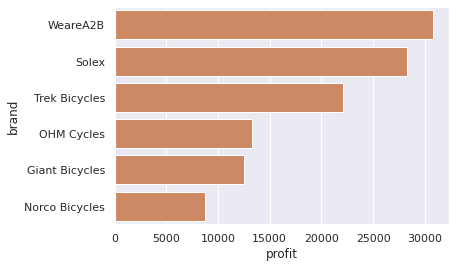

In [204]:
brand_HighNetWorth=cus_info[cus_info["wealth_segment"]=="High Net Worth"]
brand_HighNetWorth=brand_HighNetWorth.groupby("brand")["Profits"].sum()
brand_HighNetWorth=brand_HighNetWorth.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="brand",data=brand_HighNetWorth,color=base_color)

### gender of highnetworth 

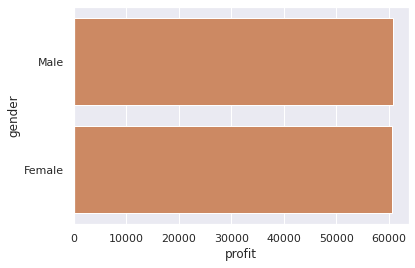

In [205]:
gender__HighNetWorth=cus_info[cus_info["wealth_segment"]=="High Net Worth"]
gender__HighNetWorth=gender__HighNetWorth.groupby("gender")["Profits"].sum()
gender__HighNetWorth=gender__HighNetWorth.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="gender",data=gender__HighNetWorth,color=base_color)

### product line of high networthvalue customers 


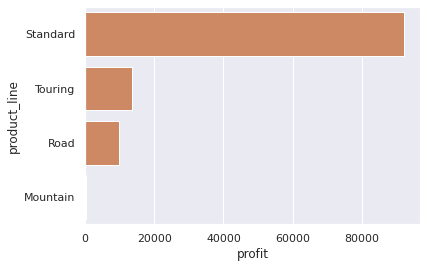

In [206]:
product_line__HighNetWorth=cus_info[cus_info["wealth_segment"]=="High Net Worth"]
product_line__HighNetWorth=product_line__HighNetWorth.groupby("product_line")["Profits"].sum()
product_line__HighNetWorth=product_line__HighNetWorth.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="product_line",data=product_line__HighNetWorth,color=base_color)

### product size of highnetworth 

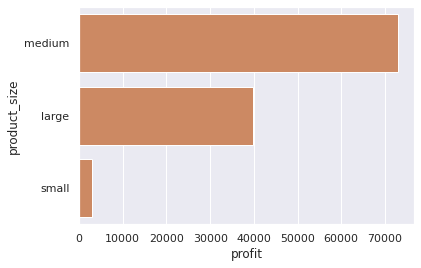

In [207]:
product_size_affluent=cus_info[cus_info["wealth_segment"]=="High Net Worth"]
product_size_affluent=product_size_affluent.groupby("product_size")["Profits"].sum()
product_size_affluent=product_size_affluent.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="product_size",data=product_size_affluent,color=base_color)

### products class of high net worth customers 


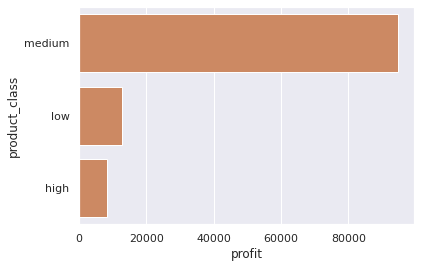

In [208]:
product_class_HighNetWorth=cus_info[cus_info["wealth_segment"]=="High Net Worth"]
product_class_HighNetWorth=product_class_HighNetWorth.groupby("product_class")["Profits"].sum()
product_class_HighNetWorth=product_class_HighNetWorth.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="profit",y="product_class",data=product_class_HighNetWorth,color=base_color)

### own cars or not 

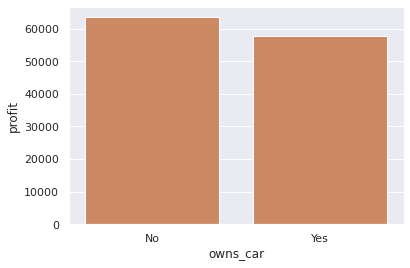

In [209]:
HighNetWorth=cus_info[cus_info["wealth_segment"]=="High Net Worth"]
HighNetWorth=HighNetWorth.groupby("owns_car")["Profits"].sum()
HighNetWorth=HighNetWorth.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="owns_car",y="profit",data=HighNetWorth,color=base_color)

### online order or not 

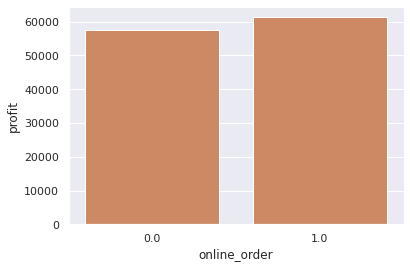

In [210]:
HighNetWorth=cus_info[cus_info["wealth_segment"]=="High Net Worth"]
HighNetWorth=HighNetWorth.groupby("online_order")["Profits"].sum()
HighNetWorth=HighNetWorth.reset_index(name="profit").sort_values(by="profit",ascending=False)
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="online_order",y="profit",data=HighNetWorth,color=base_color)

# Time series 


In [211]:
cus_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [212]:
cus_transaction.set_index("transaction_date",inplace=True)

In [213]:
profit_dates=cus_transaction["Profits"]
profit_dates

transaction_date
2017-01-01     509.97
2017-01-01    1660.88
2017-01-01    1028.76
2017-01-01     167.21
2017-01-01      45.96
               ...   
2017-12-30     195.34
2017-12-30     110.81
2017-12-30     451.65
2017-12-30     209.84
2017-12-30    1383.61
Name: Profits, Length: 20000, dtype: float64

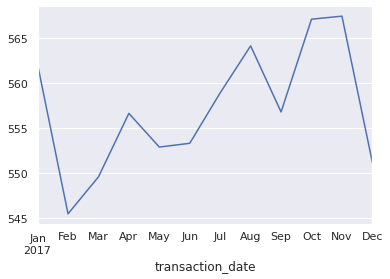

In [214]:
profit_dates.resample(rule="M").mean().plot()

### there is a dramastical drop on february and sep 
### sale peak in Novembers

# Hypothesis testing
**we want to know if the new page is better than the old page so .** People who own cars will buy more bicycle 
$$H_0: M_{car}-M_{nocar} <=0$$
$$H_1: M_{car}-M_{nocar} > 0$$
    


> Test whether having a car or not affect customers behaviors on buying a bicylce or not

### split data into train and split test 

In [215]:
X = cus_info["owns_car"]
y = cus_info["Profits"]

In [216]:
from sklearn.model_selection import train_test_split
ownscar_treatment,ownscar_control,Profits_treatment,Profits_control= train_test_split(X, y, test_size = 0.2, random_state = 1)

In [217]:
df1=pd.concat([ownscar_treatment,Profits_treatment],join="outer", axis=1 )
df2=pd.concat([ownscar_control,Profits_control],join="outer", axis=1)


In [218]:
df1.rename(columns={ "owns_car": "owns_car_treatment","Profits":"Profits_treatment" })
df1["treatment"]="treatment"
df1

,owns_car,Profits,treatment
277,Yes,64.93,treatment
727,No,903.11,treatment
483,No,641.64,treatment
836,No,957.02,treatment
218,Yes,1592.19,treatment
...,...,...,...
715,Yes,133.38,treatment
767,No,64.51,treatment
72,Yes,1544.61,treatment
235,No,45.96,treatment


In [219]:
df2.rename(columns={ "owns_car": "owns_car_control","Profits":"Profits_control" })
df2["control"]="control"
df2

,owns_car,Profits,control
523,No,167.21,control
314,No,1660.88,control
769,No,812.44,control
320,No,1069.55,control
810,Yes,1383.61,control
...,...,...,...
865,No,1612.25,control
721,Yes,1702.55,control
472,No,1612.25,control
563,No,75.48,control


In [220]:
df=pd.concat([df1,df2],join="outer")


In [221]:
df

,owns_car,Profits,treatment,control
277,Yes,64.93,treatment,NaN
727,No,903.11,treatment,NaN
483,No,641.64,treatment,NaN
836,No,957.02,treatment,NaN
218,Yes,1592.19,treatment,NaN
...,...,...,...,...
865,No,1612.25,NaN,control
721,Yes,1702.55,NaN,control
472,No,1612.25,NaN,control
563,No,75.48,NaN,control


In [222]:
profit_car=df1[df1["owns_car"]=="Yes"]["Profits"].mean()
profit_nocar=df1[df1["owns_car"]=="No"]["Profits"].mean()
profit_treatment=profit_car-profit_nocar
profit_treatment


12.403661971830047

In [223]:
profit_car=df2[df2["owns_car"]=="Yes"]["Profits"].mean()
profit_nocar=df2[df2["owns_car"]=="No"]["Profits"].mean()
profit_control=profit_car-profit_nocar
profit_control 

74.47649533307708

In [224]:
# compute observed difference in classroom time
obs_diff = profit_treatment - profit_control
obs_diff


-62.072833361247035

In [225]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b1_samp = df1.sample(size, replace=True)
    b2_samp = df2.sample(size,replace=True )
    profit_car=b1_samp[b1_samp["owns_car"]=="Yes"]["Profits"].mean()
    profit_nocar=b1_samp[b1_samp["owns_car"]=="No"]["Profits"].mean()
    profit_treatment=profit_car-profit_nocar
    profit_car=b2_samp[b2_samp["owns_car"]=="Yes"]["Profits"].mean()
    profit_nocar=b2_samp[b2_samp["owns_car"]=="No"]["Profits"].mean()
    profit_control=profit_car-profit_nocar
    diffs.append(profit_treatment  - profit_control)

In [226]:
 # convert to numpy array
diffs = np.array(diffs)  

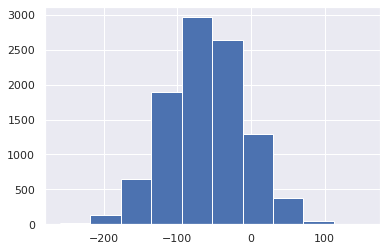

In [227]:
 
# plot sampling distribution
plt.hist(diffs);

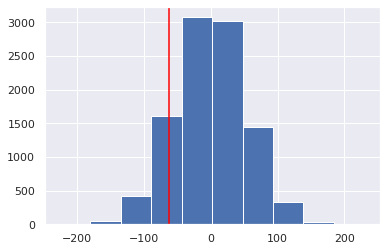

In [228]:

# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)
# plot null distribution
plt.hist(null_vals)
# plot line for observed statistic
plt.axvline(obs_diff, c='red')

In [229]:
# compute p value
(null_vals > obs_diff).mean()

0.8792

**p value > 0.05 => accept the null hypothesis that people who has no car make more profit than people have car in the group 100 bringing most profit to the companies**

# export 100 customers 

In [230]:
#writer = pd.ExcelWriter('KPMG_result.xlsx',engine='xlsxwriter')
#Write each dataframe to a different worksheet.
#cus_info.to_excel(writer, sheet_name='RFM_model')
#writer.save()

# conclusion 

### Mass customers(average customers)
even they don't pay alot for each products. Howevere, they are they ones in total contribute the most compared to Affluent and High Net Worth customers.
The people from Mass segmentation are mostly from  business level including Financial Services , Manufacturing, Retail. They are Project Manager, Analysist, manager, web developer, coach, nurse. They are from New South Wales. The products which are famous are solex and WeareA2B and medium types of bicycle. Female has more intention to buy bicycle. The special figture in this mass segment people who own cars are likely to buy more bicycle than who has no cars and people like to buy online. 

## Affluent customers ( rich customers)
Affuent customers in the list of 100 customers should be retained ,most of them who contribute the most to the profits of the companies come from 1) manufacturing industry, retail , health care. So when making a marketing stratergy, this companies should target to those 3 main industry. People from Victory buy more bicycle than others. WeareA2B is the best_seller, next is solex and trek bicycle, people prefer standards bike with medium and large size , touring and road account for small amount, mountain bicycle c is not significant. median class are more saught_after .This this affluenct section , female is more dominant compared to Male customers=> Therefore , should customize more option for woman. Most of people who buy cars don't have cars. People prefer to buy cars on the spots. 

## High Net Worth (a rich person who has at least $1 million available to make investments with)
The highest ranking of job industry category segmetn is Health.The people in this segment who buy bicycle the most seems really care about health because customers who came from health segment is 2.6 times than the 2nd one. Who live mostly in New South Wales (NSW) state. 
The bicycle WeareA2B is till the best seller in this segment. Product size, product class and product line are mostly profitable in standard and medium bicycles  . There is no difference between male and female purchase in High Net Worth. In contrary with affluent customers, the online order is slightly higher than offline, and the ratio of own cars is not so different. 

# Hypothesis test 
p value > 0.05 => accept the null hypothesis that people who has no car make more profit than people have car in the group 100 bringing most profit to the companies